In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}


aruco_type = "DICT_5X5_250"
id = 1

# Get the dictionary
arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[aruco_type])

print("ArUCo type '{}' with ID '{}'".format(aruco_type, id))

ArUCo type 'DICT_5X5_250' with ID '1'


In [3]:
# Generate the marker
marker_id = 2  # Change this to the ID of the marker you want to generate
marker_size = 700  # Change this to the size (in pixels) you want the marker to be
marker_image = cv2.aruco.generateImageMarker(arucoDict, marker_id, marker_size)

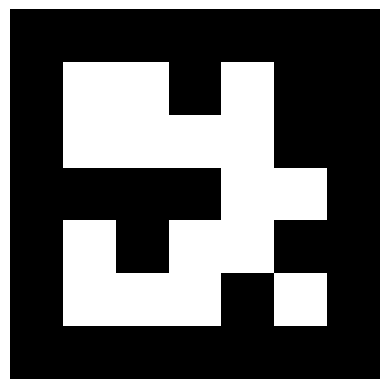

True

In [26]:
# Display the marker
plt.imshow(marker_image, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()
cv2.imwrite('marker_3.png', marker_image)

In [4]:
import cv2
import cv2.aruco as aruco
import numpy as np

In [6]:
image = cv2.imread('handWritten.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_5X5_250)
parameters = aruco.DetectorParameters()
# Create ArucoDetector object
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

In [8]:
# Detect markers
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(image)

In [9]:
markerCorners

(array([[[2252.,  132.],
         [2336.,  130.],
         [2334.,  220.],
         [2249.,  220.]]], dtype=float32),
 array([[[ 92., 161.],
         [179., 161.],
         [183., 244.],
         [ 97., 244.]]], dtype=float32),
 array([[[ 102., 2928.],
         [ 180., 2927.],
         [ 182., 3010.],
         [ 103., 3014.]]], dtype=float32))

In [10]:
markerIds

array([[2],
       [0],
       [1]], dtype=int32)

In [26]:
def getPaperCorners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_5X5_250)
    parameters = aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

    # Detect markers
    markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(image)
    
    lst = []
    for corner in markerCorners:
        x, y, w, h = cv2.boundingRect(corner)
        lst.append((x, y))
        lst = sorted(lst, key=lambda x: (x[0], x[1]))
    
    return lst

In [28]:
lst = getPaperCorners(image)

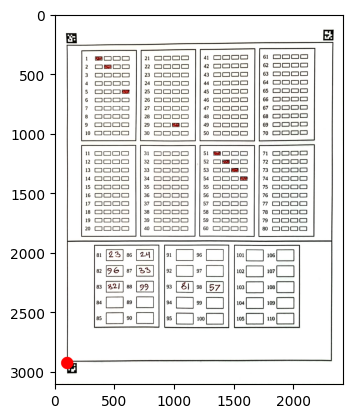

In [33]:
cp = image.copy()
cp = cv2.circle(cp, lst[1], 2, (255, 0, 0), 100)
plt.imshow(cp)

In [49]:
# Define the size of the calibration pattern (e.g., chessboard)
pattern_size = (8, 6)  # Change this according to your calibration pattern

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0), ..., (7,5,0)
objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []  # 3D points in the world coordinate
imgpoints = []  # 2D points in the image coordinate

# Loop through calibration images
for img_file in calibration_images:
    img = cv2.imread('paper5.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    # If corners are found, add object points and image points
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

# Calibrate the camera
ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print the camera matrix
print("Camera Matrix:")
print(cameraMatrix)


NameError: name 'calibration_images' is not defined

In [48]:
# Estimate pose of each marker
rvecs, tvecs, _ = cv2.aruco.estimatePoseSingleMarkers(markerCorners, 0.05, None, None)

# Draw axis for the ArUco markers (optional)
for i in range(len(ids)):
    frame = cv2.aruco.drawAxis(frame, camera_matrix, dist_coeffs, rvecs[i], tvecs[i], 0.1)


error: OpenCV(4.9.0) /io/opencv/modules/calib3d/src/calibration.cpp:1071: error: (-215:Assertion failed) CV_IS_MAT(objectPoints) && CV_IS_MAT(imagePoints) && CV_IS_MAT(A) && CV_IS_MAT(rvec) && CV_IS_MAT(tvec) in function 'cvFindExtrinsicCameraParams2'


In [47]:
rvecs